In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import cv2
import matplotlib.pyplot as plt
from moving_object_detector import MovingObjectDetector
from optical_flow import OpticalFlow
from utils import blur_image, threshold_image

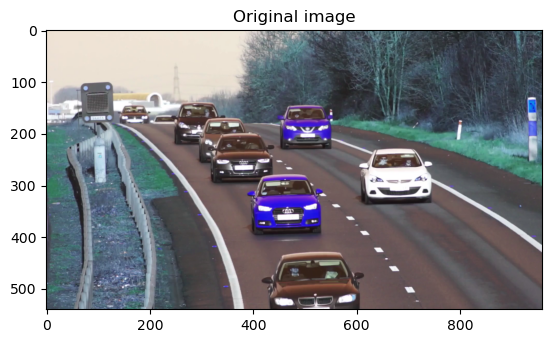

In [45]:
cap = cv2.VideoCapture("../data/videos/cars.mp4")
_, first_frame = cap.read()
_, second_frame = cap.read()

original_image = cv2.resize(second_frame, (0, 0), fx=0.5, fy=0.5)
plt.imshow(original_image)
cv2.imwrite("../data/images/pres/original.png", original_image)
plt.title("Original image")
plt.show()

# Optical Flow

In [46]:

opt_flow = OpticalFlow()
opt_flow.run(first_frame)
opt_flow_img = opt_flow.run(second_frame)


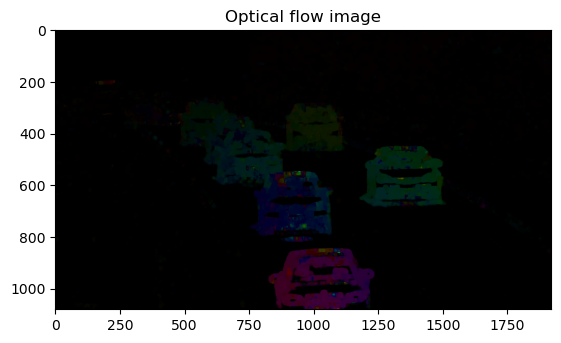

In [47]:
opt_flow_img = cv2.cvtColor(opt_flow_img, cv2.COLOR_HSV2RGB)
cv2.imwrite("../data/images/pres/opt_flow.png", opt_flow_img)
plt.imshow(opt_flow_img)
plt.title("Optical flow image")
plt.show()

# Moving Object Detector

In [48]:
mod = MovingObjectDetector()
mod.run(first_frame)
mod.run(second_frame)

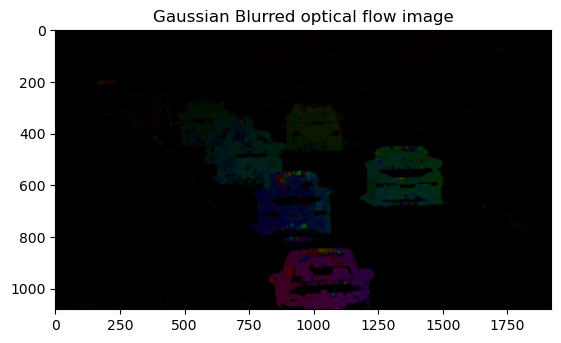

In [49]:
blurred_image = blur_image(opt_flow_img)
cv2.imwrite("../data/images/pres/blur.png", blurred_image)
plt.imshow(blurred_image)
plt.title("Gaussian Blurred optical flow image")
plt.show()

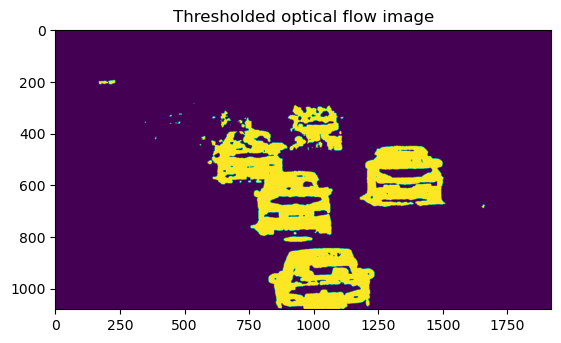

In [50]:
thresholded_image = mod.thresholded_image
cv2.imwrite("../data/images/pres/threshold.png", thresholded_image)
plt.imshow(thresholded_image)
plt.title("Thresholded optical flow image")
plt.show()

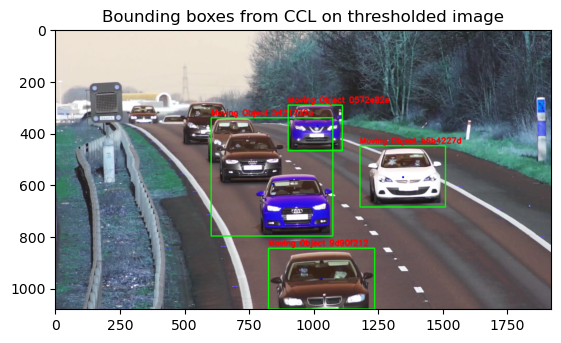

In [51]:
bounding_box_image = mod.get_image_with_bounding_boxes(second_frame)
cv2.imwrite("../data/images/pres/moving_bound.png", bounding_box_image)
plt.imshow(bounding_box_image)
plt.title("Bounding boxes from CCL on thresholded image")
plt.show()

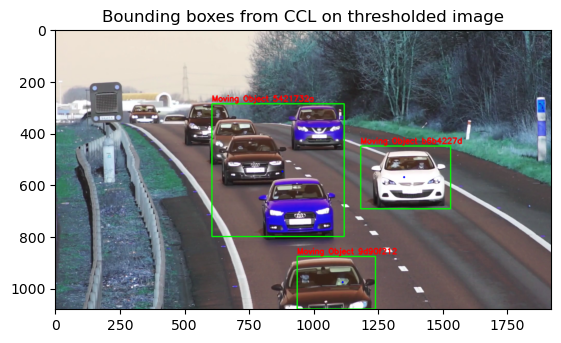

In [52]:
_, f = cap.read()
mod.run(f)
_, f = cap.read()
mod.run(f)
_, f = cap.read()
mod.run(f)
_, frame = cap.read()
mod.run(frame)
bounding_box_image = mod.get_image_with_bounding_boxes(frame)
cv2.imwrite("../data/images/pres/moving_bound_1.png", bounding_box_image)
plt.imshow(bounding_box_image)
plt.title("Bounding boxes from CCL on thresholded image")
plt.show()


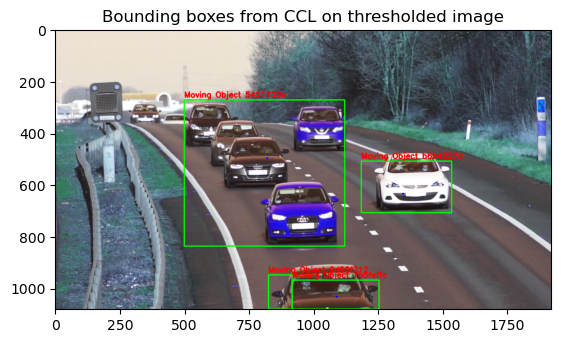

In [53]:
_, f = cap.read()
mod.run(f)
_, f = cap.read()
mod.run(f)
_, f = cap.read()
mod.run(f)
_, frame = cap.read()
mod.run(frame)
bounding_box_image = mod.get_image_with_bounding_boxes(frame)
cv2.imwrite("../data/images/pres/moving_bound_2.png", bounding_box_image)
plt.imshow(bounding_box_image)
plt.title("Bounding boxes from CCL on thresholded image")
plt.show()